<a href="https://colab.research.google.com/github/AlvaroCastro22/SI-TF/blob/main/prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error Cuadrático Medio (MSE): 5500406106.34648

Distrito: ATE
Año: 2022, Población: 687615, Residuos Municipales Predichos: 222029.03
Año: 2023, Población: 701367, Residuos Municipales Predichos: 222029.03
Año: 2024, Población: 715395, Residuos Municipales Predichos: 222029.03
Año: 2025, Población: 729703, Residuos Municipales Predichos: 222029.03

Distrito: CALLAO
Año: 2022, Población: 520709, Residuos Municipales Predichos: 152864.23
Año: 2023, Población: 531123, Residuos Municipales Predichos: 152864.23
Año: 2024, Población: 541746, Residuos Municipales Predichos: 152864.23
Año: 2025, Población: 552581, Residuos Municipales Predichos: 152864.23

Distrito: COMAS
Año: 2022, Población: 782, Residuos Municipales Predichos: 78479.46
Año: 2023, Población: 798, Residuos Municipales Predichos: 78479.46
Año: 2024, Población: 814, Residuos Municipales Predichos: 109172.77
Año: 2025, Población: 830, Residuos Municipales Predichos: 109172.77

Distrito: LOS OLIVOS
Año: 2022, Población: 355528, R

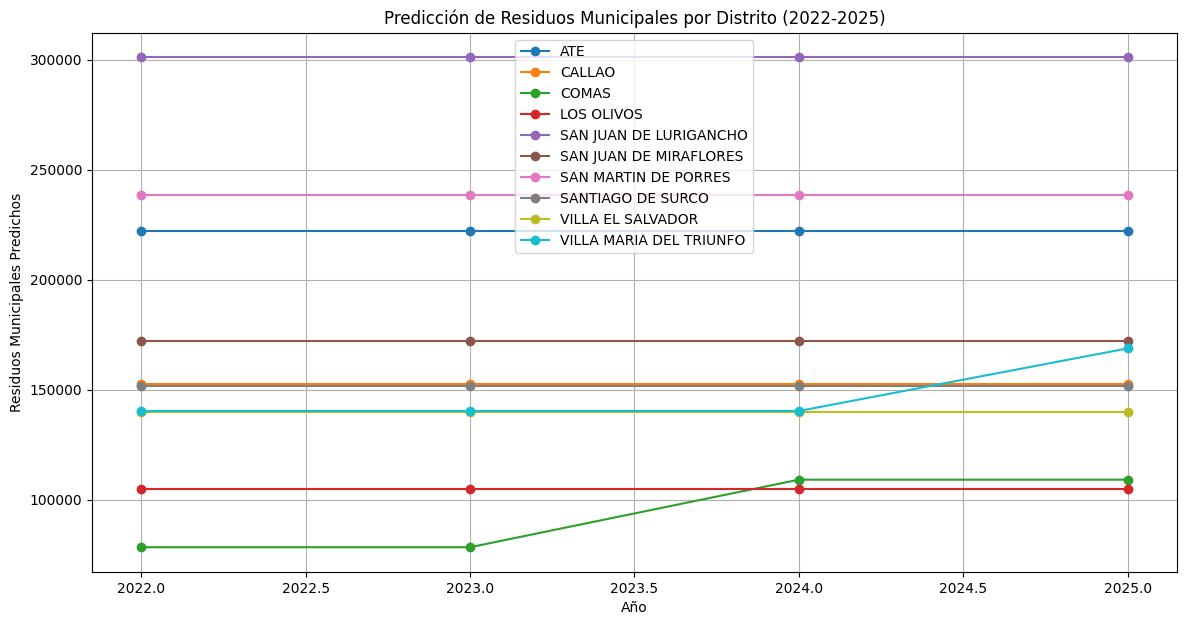

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo CSV
file_path = '/home/data/datos_procesados.csv'
df = pd.read_csv(file_path, delimiter=',')

# Paso 2: Seleccionar las características (PERIODO y POB_URBANA) y la variable objetivo (QRESIDUOS_MUN)
X = df[['DISTRITO', 'PERIODO', 'POB_URBANA']]
y = df['QRESIDUOS_MUN']

# Convertir 'DISTRITO' a variables dummy (one-hot encoding)
X = pd.get_dummies(X, columns=['DISTRITO'])

# Paso 3: Estandarizar las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear el modelo kNN y entrenarlo con los datos de entrenamiento
knn = KNeighborsRegressor(n_neighbors=5)  # Usamos 5 vecinos como ejemplo
knn.fit(X_train, y_train)

# Paso 6: Hacer predicciones en el conjunto de prueba y calcular el error cuadrático medio (MSE)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Paso 7: Predicción para los próximos años por distrito
future_years = [2022, 2023, 2024, 2025]
future_data = []

for distrito in df['DISTRITO'].unique():
    poblacion_anterior = df[(df['DISTRITO'] == distrito) & (df['PERIODO'] == df['PERIODO'].max())]['POB_URBANA'].values[0]
    for year in future_years:
        if year == 2022:
            poblacion = poblacion_anterior
        else:
            poblacion *= 1.02  # Suposición de crecimiento poblacional

        future_data.append({
            'DISTRITO': distrito,
            'PERIODO': year,
            'POB_URBANA': poblacion
        })

future_df = pd.DataFrame(future_data)
future_df_encoded = pd.get_dummies(future_df, columns=['DISTRITO'])
future_df_scaled = scaler.transform(future_df_encoded)

future_predictions = knn.predict(future_df_scaled)
future_df['QRESIDUOS_MUN_PRED'] = future_predictions

# Imprimir la población total y residuos municipales predichos por distrito y año
for distrito in df['DISTRITO'].unique():
    print(f'\nDistrito: {distrito}')
    distrito_data = future_df[future_df['DISTRITO'] == distrito]
    for year in future_years:
        row = distrito_data[distrito_data['PERIODO'] == year]
        poblacion = row['POB_URBANA'].values[0]
        residuos = row['QRESIDUOS_MUN_PRED'].values[0]
        print(f'Año: {year}, Población: {poblacion:.0f}, Residuos Municipales Predichos: {residuos:.2f}')

# Paso 8: Visualización de los resultados
plt.figure(figsize=(14, 7))
for distrito in df['DISTRITO'].unique():
    distrito_data = future_df[future_df['DISTRITO'] == distrito]
    plt.plot(distrito_data['PERIODO'], distrito_data['QRESIDUOS_MUN_PRED'], marker='o', label=distrito)

plt.xlabel('Año')
plt.ylabel('Residuos Municipales Predichos')
plt.title('Predicción de Residuos Municipales por Distrito (2022-2025)')
plt.legend()
plt.grid(True)
plt.show()

# Guardar el DataFrame de predicciones futuras en un archivo CSV
future_df.to_csv('/home/data/predicciones_futuras.csv', index=False)
